# Spectral Bandpass Dependence Correction

Reflectance spectrophotometers measuring energy at intervals larger than a single wavelength (5nm or 10nm steps for example) integrates the energy between $\lambda_{i-1}$ and $\lambda_{i+1}$ for a given wavelength $\lambda_{i}$.

The sampled spectral reflectance data $P^\prime$ needs to be corrected to retrieve the true spectral reflectance data $P$ if the spectrophotometer operating software has not applied spectral bandpass dependence correction. <a name="back_reference_1"></a><a href="#reference_1">[1]</a><a name="back_reference_2"></a><a href="#reference_2">[2]</a>

## Stearns & Stearns Method

Stearns and Stearns (1988) proposed the following equation for spectral bandpass dependence correction:

$$
\begin{equation}
P_i = -\alpha P^\prime_{i -1} + (1 + 2\alpha)P^\prime_{i} -\alpha P^\prime_{i+1}
\end{equation}
$$

where $\alpha = 0.083$ and if the wavelengths being corrected are the first or last one the equation for the first wavelength should be:

$$
\begin{equation}
P_i = (1 + \alpha)P^\prime_{i} - \alpha P^\prime_{i+1}
\end{equation}
$$

and for the last wavelength:

$$
\begin{equation}
P_i = (1 + \alpha)P^\prime_{i} - \alpha P^\prime_{i-1}
\end{equation}
$$

Implementation in [Colour](https://github.com/colour-science/colour/) is available through the *colour.bandpass_correction_stearns* definition or the generic *colour.bandpass_correction* with *method='Stearns'* argument: 

In [1]:
%matplotlib inline

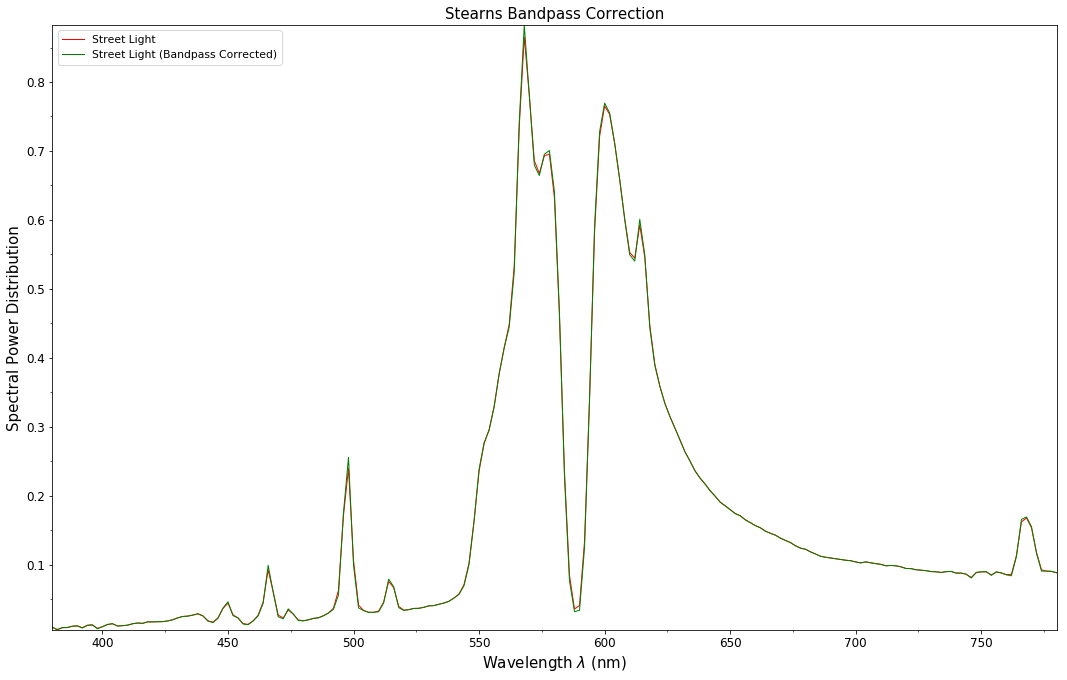

In [2]:
import colour
from colour.plotting import *

colour.utilities.filter_warnings(True, False)

colour_plotting_defaults()

# Spectral bandpass dependence correction.
street_light_spd_data = {
    380: 8.9770000e-003,
    382: 5.8380000e-003,
    384: 8.3290000e-003,
    386: 8.6940000e-003,
    388: 1.0450000e-002,
    390: 1.0940000e-002,
    392: 8.4260000e-003,
    394: 1.1720000e-002,
    396: 1.2260000e-002,
    398: 7.4550000e-003,
    400: 9.8730000e-003,
    402: 1.2970000e-002,
    404: 1.4000000e-002,
    406: 1.1000000e-002,
    408: 1.1330000e-002,
    410: 1.2100000e-002,
    412: 1.4070000e-002,
    414: 1.5150000e-002,
    416: 1.4800000e-002,
    418: 1.6800000e-002,
    420: 1.6850000e-002,
    422: 1.7070000e-002,
    424: 1.7220000e-002,
    426: 1.8250000e-002,
    428: 1.9930000e-002,
    430: 2.2640000e-002,
    432: 2.4630000e-002,
    434: 2.5250000e-002,
    436: 2.6690000e-002,
    438: 2.8320000e-002,
    440: 2.5500000e-002,
    442: 1.8450000e-002,
    444: 1.6470000e-002,
    446: 2.2470000e-002,
    448: 3.6250000e-002,
    450: 4.3970000e-002,
    452: 2.7090000e-002,
    454: 2.2400000e-002,
    456: 1.4380000e-002,
    458: 1.3210000e-002,
    460: 1.8250000e-002,
    462: 2.6440000e-002,
    464: 4.5690000e-002,
    466: 9.2240000e-002,
    468: 6.0570000e-002,
    470: 2.6740000e-002,
    472: 2.2430000e-002,
    474: 3.4190000e-002,
    476: 2.8160000e-002,
    478: 1.9570000e-002,
    480: 1.8430000e-002,
    482: 1.9800000e-002,
    484: 2.1840000e-002,
    486: 2.2840000e-002,
    488: 2.5760000e-002,
    490: 2.9800000e-002,
    492: 3.6620000e-002,
    494: 6.2500000e-002,
    496: 1.7130000e-001,
    498: 2.3920000e-001,
    500: 1.0620000e-001,
    502: 4.1250000e-002,
    504: 3.3340000e-002,
    506: 3.0820000e-002,
    508: 3.0750000e-002,
    510: 3.2500000e-002,
    512: 4.5570000e-002,
    514: 7.5490000e-002,
    516: 6.6560000e-002,
    518: 3.9350000e-002,
    520: 3.3880000e-002,
    522: 3.4610000e-002,
    524: 3.6270000e-002,
    526: 3.6580000e-002,
    528: 3.7990000e-002,
    530: 4.0010000e-002,
    532: 4.0540000e-002,
    534: 4.2380000e-002,
    536: 4.4190000e-002,
    538: 4.6760000e-002,
    540: 5.1490000e-002,
    542: 5.7320000e-002,
    544: 7.0770000e-002,
    546: 1.0230000e-001,
    548: 1.6330000e-001,
    550: 2.3550000e-001,
    552: 2.7540000e-001,
    554: 2.9590000e-001,
    556: 3.2950000e-001,
    558: 3.7630000e-001,
    560: 4.1420000e-001,
    562: 4.4850000e-001,
    564: 5.3330000e-001,
    566: 7.3490000e-001,
    568: 8.6530000e-001,
    570: 7.8120000e-001,
    572: 6.8580000e-001,
    574: 6.6740000e-001,
    576: 6.9300000e-001,
    578: 6.9540000e-001,
    580: 6.3260000e-001,
    582: 4.6240000e-001,
    584: 2.3550000e-001,
    586: 8.4450000e-002,
    588: 3.5550000e-002,
    590: 4.0580000e-002,
    592: 1.3370000e-001,
    594: 3.4150000e-001,
    596: 5.8250000e-001,
    598: 7.2080000e-001,
    600: 7.6530000e-001,
    602: 7.5290000e-001,
    604: 7.1080000e-001,
    606: 6.5840000e-001,
    608: 6.0140000e-001,
    610: 5.5270000e-001,
    612: 5.4450000e-001,
    614: 5.9260000e-001,
    616: 5.4520000e-001,
    618: 4.4690000e-001,
    620: 3.9040000e-001,
    622: 3.5880000e-001,
    624: 3.3400000e-001,
    626: 3.1480000e-001,
    628: 2.9800000e-001,
    630: 2.8090000e-001,
    632: 2.6370000e-001,
    634: 2.5010000e-001,
    636: 2.3610000e-001,
    638: 2.2550000e-001,
    640: 2.1680000e-001,
    642: 2.0720000e-001,
    644: 1.9920000e-001,
    646: 1.9070000e-001,
    648: 1.8520000e-001,
    650: 1.7970000e-001,
    652: 1.7410000e-001,
    654: 1.7070000e-001,
    656: 1.6500000e-001,
    658: 1.6080000e-001,
    660: 1.5660000e-001,
    662: 1.5330000e-001,
    664: 1.4860000e-001,
    666: 1.4540000e-001,
    668: 1.4260000e-001,
    670: 1.3840000e-001,
    672: 1.3500000e-001,
    674: 1.3180000e-001,
    676: 1.2730000e-001,
    678: 1.2390000e-001,
    680: 1.2210000e-001,
    682: 1.1840000e-001,
    684: 1.1530000e-001,
    686: 1.1210000e-001,
    688: 1.1060000e-001,
    690: 1.0950000e-001,
    692: 1.0840000e-001,
    694: 1.0740000e-001,
    696: 1.0630000e-001,
    698: 1.0550000e-001,
    700: 1.0380000e-001,
    702: 1.0250000e-001,
    704: 1.0380000e-001,
    706: 1.0250000e-001,
    708: 1.0130000e-001,
    710: 1.0020000e-001,
    712: 9.8310000e-002,
    714: 9.8630000e-002,
    716: 9.8140000e-002,
    718: 9.6680000e-002,
    720: 9.4430000e-002,
    722: 9.4050000e-002,
    724: 9.2510000e-002,
    726: 9.1880000e-002,
    728: 9.1120000e-002,
    730: 8.9860000e-002,
    732: 8.9460000e-002,
    734: 8.8610000e-002,
    736: 8.9640000e-002,
    738: 8.9910000e-002,
    740: 8.7700000e-002,
    742: 8.7540000e-002,
    744: 8.5880000e-002,
    746: 8.1340000e-002,
    748: 8.8200000e-002,
    750: 8.9410000e-002,
    752: 8.9360000e-002,
    754: 8.4970000e-002,
    756: 8.9030000e-002,
    758: 8.7810000e-002,
    760: 8.5330000e-002,
    762: 8.5880000e-002,
    764: 1.1310000e-001,
    766: 1.6180000e-001,
    768: 1.6770000e-001,
    770: 1.5340000e-001,
    772: 1.1740000e-001,
    774: 9.2280000e-002,
    776: 9.0480000e-002,
    778: 9.0020000e-002,
    780: 8.8190000e-002}

street_light_spd = colour.SpectralPowerDistribution(
    street_light_spd_data, name='Street Light')

bandpass_corrected_street_light_spd = street_light_spd.copy()
bandpass_corrected_street_light_spd.name = 'Street Light (Bandpass Corrected)'
bandpass_corrected_street_light_spd = colour.colorimetry.bandpass_correction(
    bandpass_corrected_street_light_spd, method='Stearns 1988')

multi_spd_plot([street_light_spd, bandpass_corrected_street_light_spd], 
               title='Stearns Bandpass Correction')

We can then calculate the [$\Delta E^\star_{ab}$](http://en.wikipedia.org/wiki/Color_difference#Delta_E) between the two spectral power distributions:

In [3]:
cmfs = colour.colorimetry.STANDARD_OBSERVERS_CMFS['CIE 1931 2 Degree Standard Observer']
street_light_XYZ = colour.spectral_to_XYZ(
    street_light_spd.interpolate(
        colour.SpectralShape(interval=1)), cmfs)
bandpass_corrected_street_light_XYZ = colour.spectral_to_XYZ(
    bandpass_corrected_street_light_spd.interpolate(
        colour.SpectralShape(interval=1)), cmfs)

# Converting the *CIE XYZ* colourspace values to *CIE Lab* colourspace
# and calculating *Delta E*.
colour.difference.delta_E_CIE2000(*colour.XYZ_to_Lab(
        [street_light_XYZ / 100, bandpass_corrected_street_light_XYZ / 100]))

0.0053840303670959853

## Bibliography

1. <a href="#back_reference_1">^<a> <a name="reference_1"></a>Westland, S., Ripamonti, C., & Cheung, V. (2012). Correction for Spectral Bandpass. In *Computational Colour Science Using MATLAB* (2nd ed., p. 38). ISBN:978-0-470-66569-5
2. <a href="#back_reference_2">^<a> <a name="reference_2"></a>Stearns, E. I., & Stearns, R. E. (1988). An example of a method for correcting radiance data for Bandpass error. Color Research & Application, 13(4), 257–259. doi:10.1002/col.5080130410